## Implement Linear Regression

Trying to minimize MSE:

$$ E = \frac{1}{n} \sum_{1}^{n}{(y_i - (wxi + bi))^{2}}$$

dE/dw and dE/db

dw = 2/n * sumation xi(yi -y_hat_i)

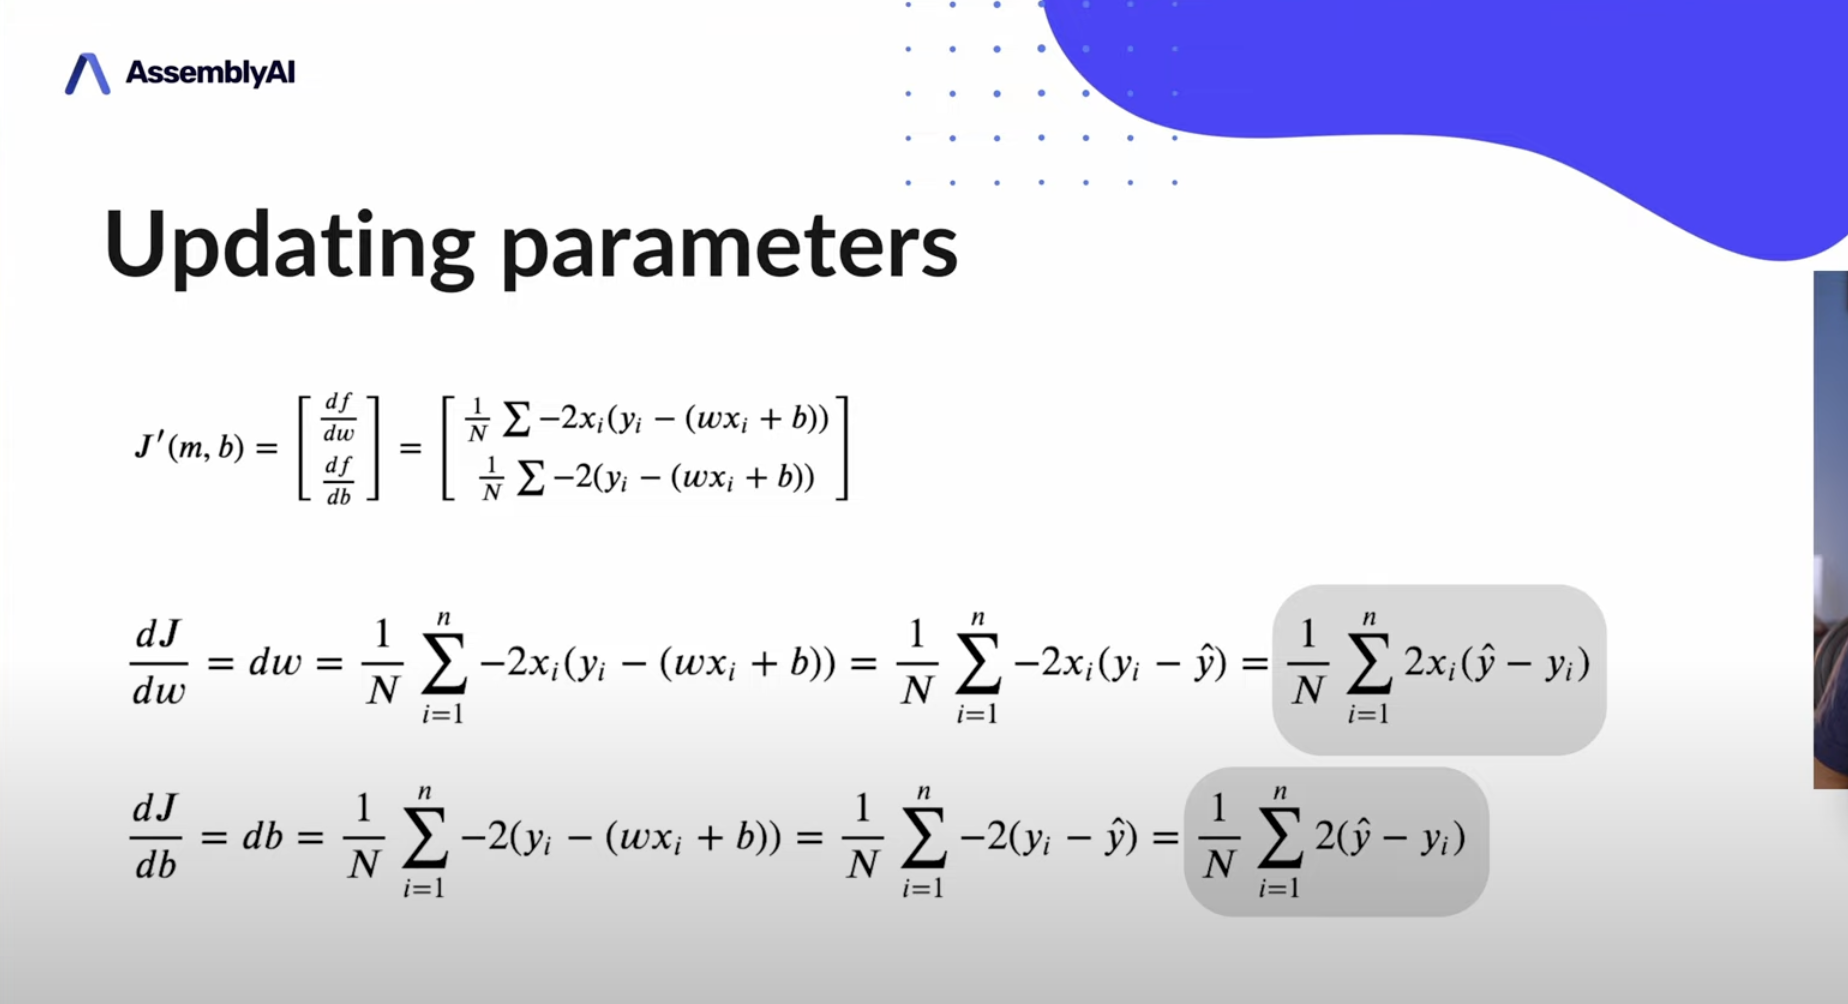

https://www.youtube.com/watch?v=ltXSoduiVwY

In [ ]:
import numpy as np
class LR:
  def __init__(self,lr: int=0.01,n_iters:int =1000):
    self.lr = 0.01
    self.n_iters = 10000
    self.w = None
    self.b = None


  def fit(self,X: np.ndarray,y:np.ndarray):
    '''
    X -> (m,d) : m input samples containing d dimensional vector where d is the number of covariates
    y -> (m,1) : m true 'y' values

    returns None
    '''
    n_samples,n_dim = X.shape
    self.w = np.zeros(n_dim)
    self.b = 0

    for i in range(self.n_iters):

      #calc loss
      y_hat = self.predict(X)
      print(y_hat.shape,"shape")
      print(y.shape)
      diff = y - y_hat
      # x : (m,d)
      # diff -> (m,1)
      #w : (d,1)

      # 1 , 2 ,3
      # 3, 2 , 1



      dw = 1/(n_samples) * np.dot(X.T,diff)

      db = 1/(n_samples) * np.sum(diff)

      self.w = self.w - self.lr * dw
      self.b = self.b - self.lr * db

  def predict(self,X: np.ndarray):
    '''
    X (k,d):numpy array -> k smaples for inference

    return y : nump array -> k estimates

    '''
    # k x d -> w d,1
    y_hat = np.dot(X,self.w) + self.b

    return y_hat



In [ ]:
X = np.random.rand(1000,3)
y = np.sum(X,axis=1)

In [ ]:
X[0]

array([0.10712299, 0.88453611, 0.8272305 ])

In [ ]:
y.shape

(1000,)

In [ ]:
def test_linear():
  X = np.random.randn(1000,3)
  y = np.sum(X,axis=1)

  clf = LR()

  clf.fit(X,y)

  y_hat = clf.predict(X)

  print(np.sum(y_hat-y))


In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]])

# 1-dimensional array
b = np.array([7, 8])

result = np.dot(a, b)

In [ ]:
a.shape

(3, 2)

In [ ]:
b.shape

(2,)

In [ ]:
print(result)

[23 53 83]


## Implement Logistic Regression

In [ ]:

#log regression = f(X) = 1/1+e^-(w.X + b)
# loss = -[yi*log(f(x)) + (1 - yi)log(1 - f(X))]


# dWj =  1/m * (y -y_hat)*xj
#db = 1/m * (y -y_hat)

class LogisticRegression:
  def __init__(self,lr=0.01,num_iters=1000):
    self.lr = lr
    self.num_iters = num_iters
    self.w = None
    self.b = None



  def fit(self,X,y):
    '''
    X : (m,d)
    Y; (m,1)

    '''
    m,d = X.shape
    self.w = np.zeros((d))
    self.b = 0

    for i in range(self.num_iters):
      y_hat = self.predict(X)
      # y : (m,1)
      #dw : (d,1)
      diff = (y_hat - y)
      dW = np.dot(X.T,diff) / m
      db = np.sum(diff) / m

      self.w = self.w - self.lr*dW
      self.b = self.b - self.lr*db




  def predict(self,X):
    '''
    X : numpy array :(m,d)

    output : y : (m,1)
    '''
    # w : d,1 , b : 1
    # X.W + b
    temp = np.dot(X,self.w) + self.b
    dr = 1 + np.exp(-temp)
    return 1/dr




In [ ]:
# prompt: write code to gernetate x and y to test my implementation of logsitic regression

import numpy as np

def generate_logistic_regression_data(num_samples=100, num_features=2):
  """Generates synthetic data for logistic regression.

  Args:
    num_samples: The number of samples to generate.
    num_features: The number of features for each sample.

  Returns:
    A tuple containing the feature matrix X and the target vector y.
  """
  X = np.random.randn(num_samples, num_features)
  # Create a linear combination of features with some random weights
  weights = np.random.randn(num_features)
  linear_combination = np.dot(X, weights)
  # Apply sigmoid function to generate binary labels
  probabilities = 1 / (1 + np.exp(-linear_combination))
  y = np.random.binomial(1, probabilities)
  return X, y

# Example usage:
X, y = generate_logistic_regression_data()
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (100, 2)
y shape: (100,)


In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X,y)

In [ ]:
clf.predict(X[0])

0.48227610928929515

In [ ]:
y[0]

0

## Implement Decision Trees

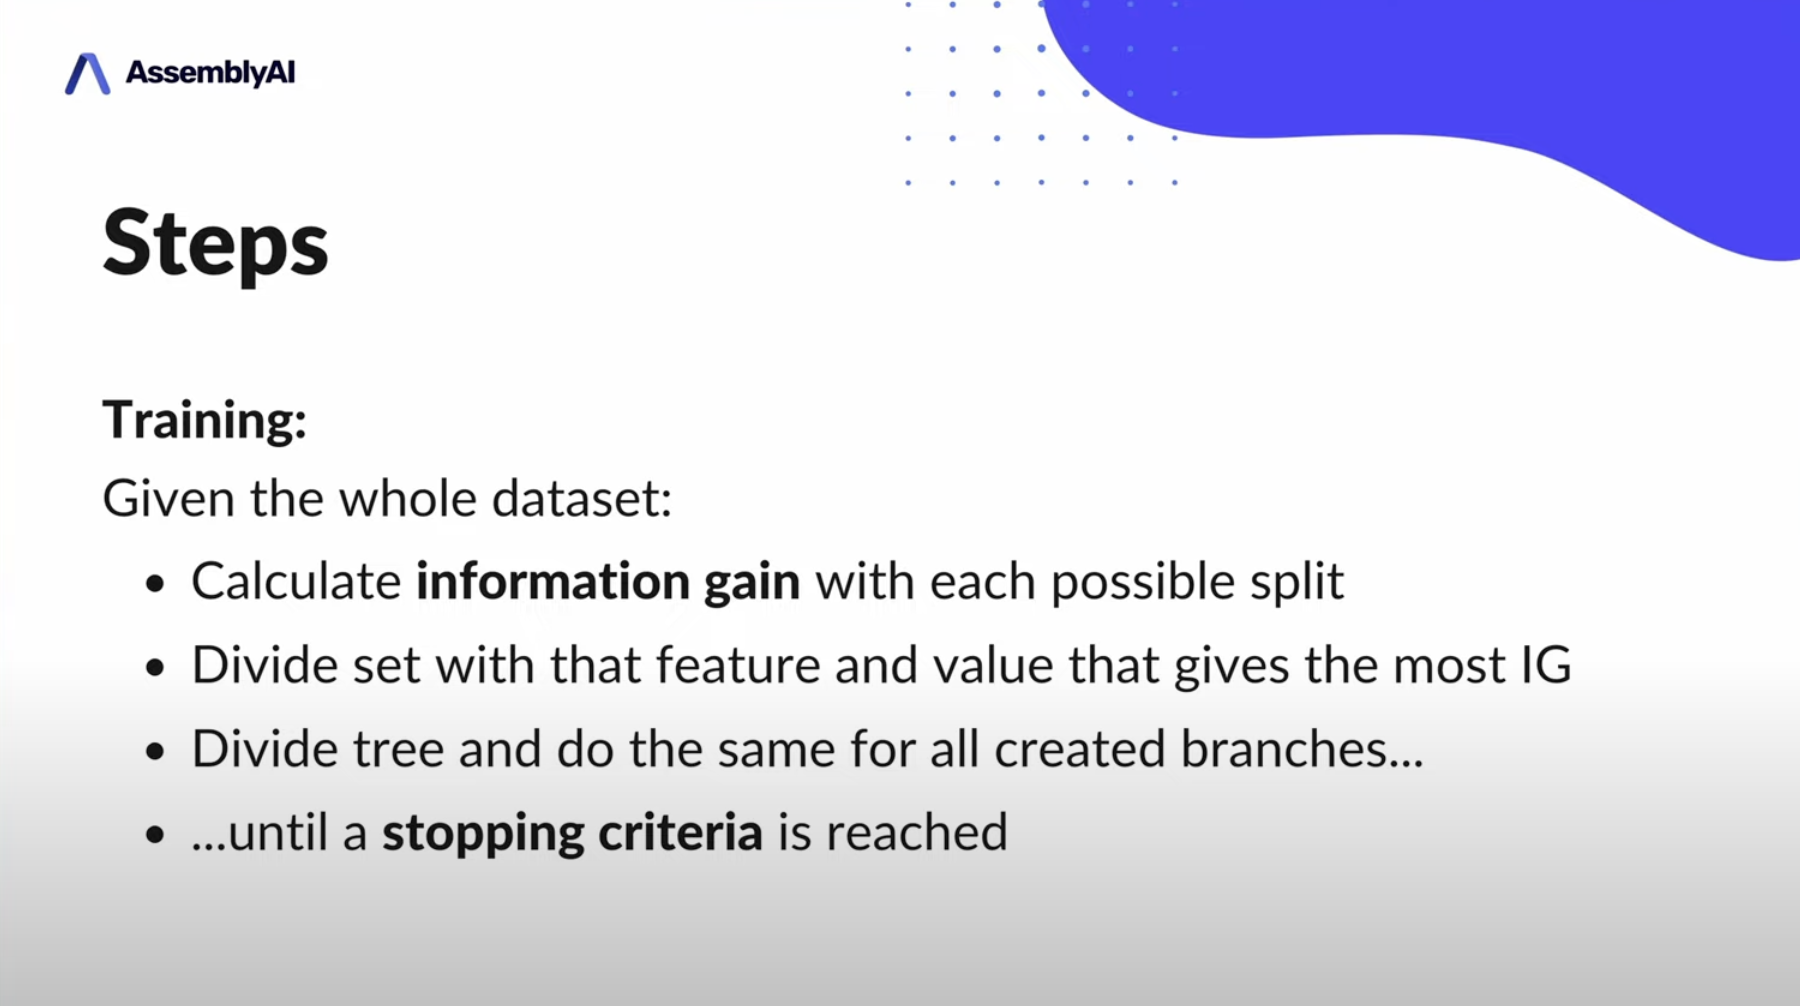

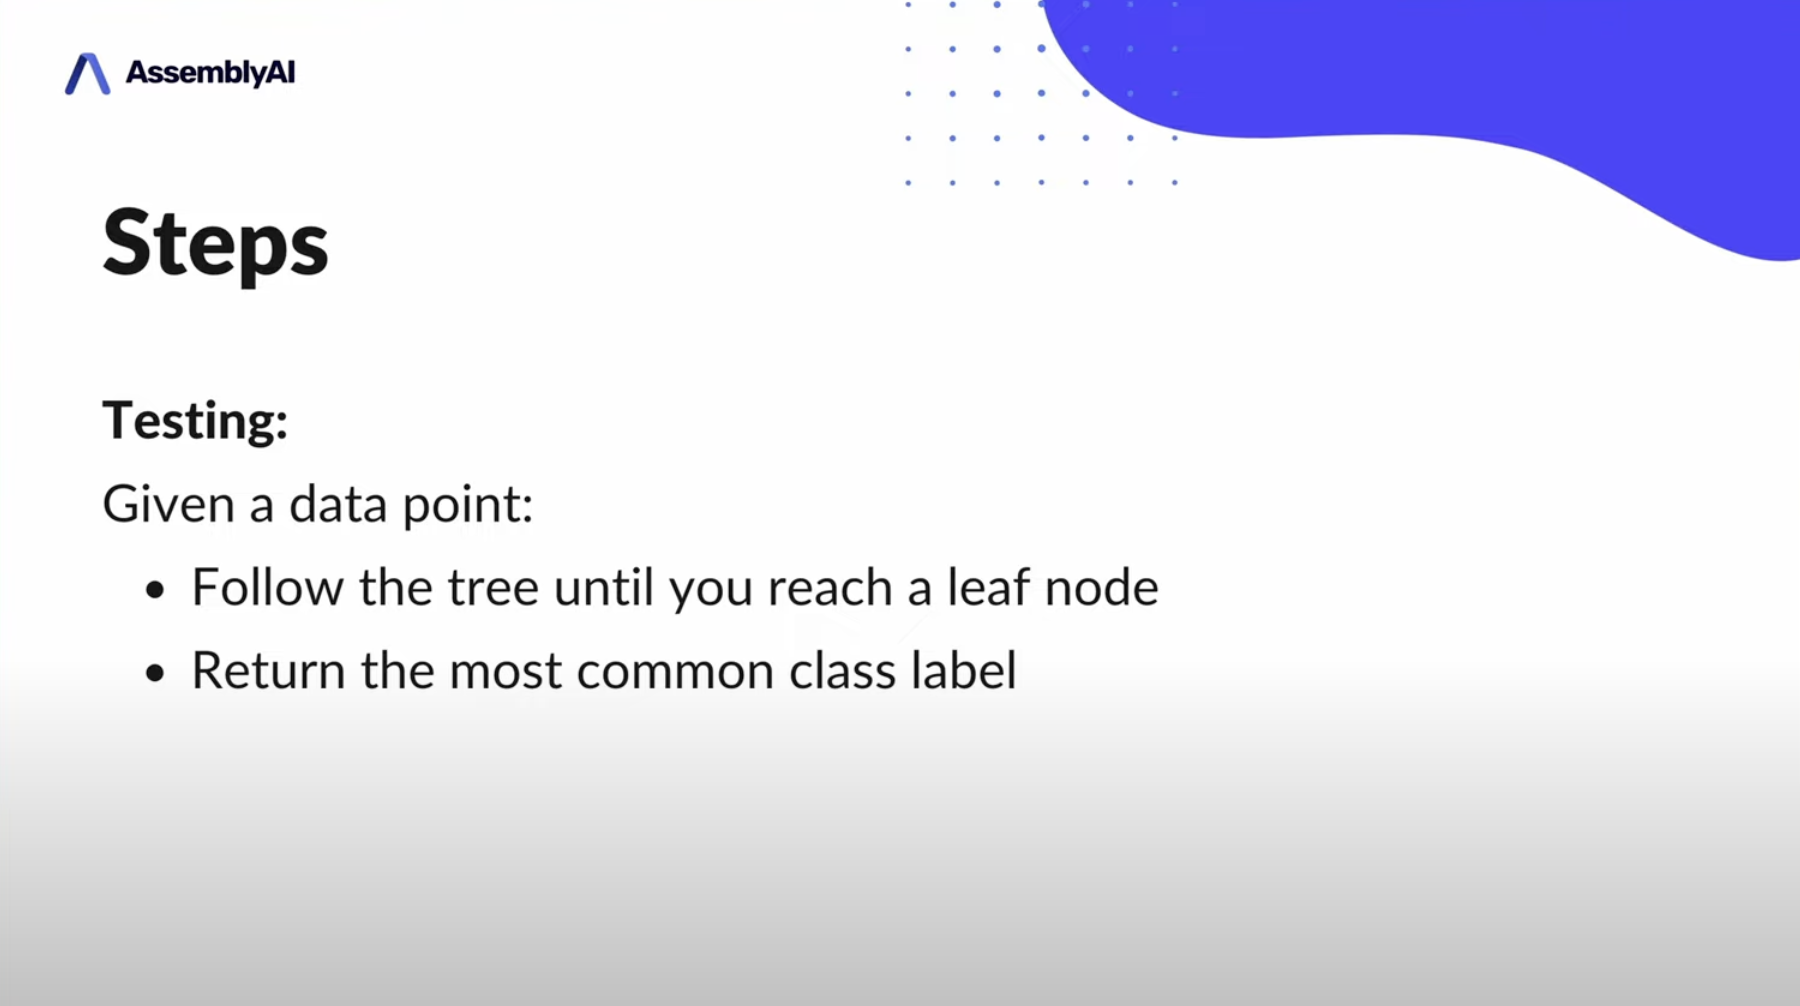

Psuedo Code:


In fit -> recursively build tree by

1. choosing the feature to split on
2. splitting on that feature
3. create children recurivedly using grow_tree

predict ->
recurisvely traverse based on current node ka feature and thresolh and x value,return when you hit a leaf node

In [ ]:
import numpy as np
from Collections import Counter

In [ ]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        print(X.shape)
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)


        # if len(left_idxs) == 0 or len(right_idxs) == 0:
        #   leaf_value = self._most_common_label(y)
        #   return Node(value=leaf_value)

        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                if len(np.unique(X_column)) == 2:  # Binary feature
                    thr = 0.5
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column < split_thresh).flatten()
        right_idxs = np.argwhere(X_column >= split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        # print(counter.most_common(1))
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


    def print_tree(self, node=None, depth=0):
        """Recursive function to print the decision tree structure"""
        if node is None:
            node = self.root

        # Base case: if it's a leaf node
        if node.is_leaf_node():
            print(f"{'  ' * depth}Leaf: {node.value}")
            return

        # Print the internal node
        print(f"{'  ' * depth}Feature {node.feature} <= {node.threshold}:")

        # Recursively print the left and right children
        print(f"{'  ' * (depth + 1)}Left:")
        self.print_tree(node.left, depth + 1)

        print(f"{'  ' * (depth + 1)}Right:")
        self.print_tree(node.right, depth + 1)

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Preprocess the data (example using OneHotEncoder for categorical columns)
data = [
    ['Sunny', 'Hot', 'High', 'Weak', 'No'],
    ['Sunny', 'Hot', 'High', 'Strong', 'No'],
    ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'High', 'Weak', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'Strong', 'No'],
    ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
    ['Sunny', 'Mild', 'High', 'Weak', 'No'],
    ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'Normal', 'Weak', 'Yes'],
    ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
    ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
    ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'High', 'Strong', 'No']
]

# Extract features (X) and target (y)
X = [row[:-1] for row in data]  # Features
y = [row[-1] for row in data]  # Target

# Encode categorical variables using OneHotEncoder
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()

# Map 'Yes' -> 1 and 'No' -> 0 for target variable
y_encoded = np.array([1 if label == 'Yes' else 0 for label in y])

# Create and train the decision tree model
dt = DecisionTree(max_depth=5)
dt.fit(X_encoded, y_encoded)

# Predict on the same data
predictions = dt.predict(X_encoded)
print(predictions)


(14, 10)
(10, 10)
(5, 10)
(2, 10)
(1, 10)
(1, 10)
(3, 10)
(5, 10)
(2, 10)
(1, 10)
(1, 10)
(3, 10)
(4, 10)
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
y_encoded

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
X_encoded.shape

(14, 10)

In [ ]:
y_encoded

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
dt.root.left.feature

7

In [ ]:
dt.print_tree()

Feature 0 <= 1.0:
  Left:
  Feature 7 <= 1.0:
    Left:
    Feature 2 <= 1.0:
      Left:
      Feature 8 <= 1.0:
        Left:
        Leaf: 1
        Right:
        Leaf: 0
      Right:
      Leaf: 0
    Right:
    Feature 9 <= 1.0:
      Left:
      Feature 1 <= 1.0:
        Left:
        Leaf: 1
        Right:
        Leaf: 0
      Right:
      Leaf: 1
  Right:
  Leaf: 1


## Practice

Psuedo Code:


In fit -> recursively build tree by

1. choosing the feature to split on
2. splitting on that feature
3. create children recurivedly using grow_tree

predict ->
recurisvely traverse based on current node ka feature and thresolh and x value,return when you hit a leaf node

In [ ]:
import numpy as np
from collections import Counter
import math

In [ ]:
#Each node will have a feature and a threshold on which we will split the data points, if a leaf node it wil have an value
#ans also ptr to right and let child
class Node:
  def __init__(self,feature=None,threshold=None,left=None,right=None,*,value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value

  def isLeaf(self):
    return self.value is not None



#decision tree class must have
#predict
#also choose a random subset of features when fitting (might be useful if we want to adopt to radnom forest)
#fit -> recrusively build-> stop ? depth, min_points, or when there is ony one class
#utilties - information, gini



class DecisionTree:
  def __init__(self,max_depth=3,min_points=5,num_features=None):
    self.max_depth = max_depth
    self.min_points = min_points #min samples reqd to split
    self.num_features = num_features
    self.root = None


  def fit(self,X,y):

    num_samples, num_features = X.shape
    self.root = self._build_tree(X,y,0)


  def _build_tree(self,X,y,depth):
    #X : m,d
    num_samples, num_features = X.shape
    self.num_features = num_features if self.num_features is None else self.num_features


    #base condition to stop this recursive function
    # if max_depth reach or y has only one label or less number of samples
    num_distinct_labels = len(np.unique(y))
    if depth > self.max_depth or num_distinct_labels == 1 or num_samples < self.min_points:
      #this is a leaf node
      return Node(value=self._cal_max_label(y))


    #first randomly select num_feature
    #this will give me self.numfeatures random features from the total

    chosen_feats = np.random.choice(num_features,self.num_features,replace=False)

    # X_sub = X[:,chosen_feats]

    #find a feature to split on and the value

    best_feature, best_threshold = self._get_split(X,y,chosen_feats)


    #split -> children
    #get indices since I will also need the corresponding y
    left_tree = np.argwhere(X[:,best_feature] <= best_threshold).flatten()
    right_tree = np.argwhere(X[:,best_feature] > best_threshold).flatten()

    #check if any one is zero

    left_child = self._build_tree(X[left_tree,:],y[left_tree],depth+1)
    right_child = self._build_tree(X[right_tree,:],y[right_tree],depth+1)

    return Node(best_feature,best_threshold,left_child,right_child)



    #recursively do same on the children

  def _cal_max_label(self,y):
      c = Counter(y)
      top = c.most_common(1)
      return top[0][0]



  def _get_split(self,X,y,feat_idxs):
    '''
    X is a subset of the original X has features f < d
    I need to choose best feature to spit on

    Gini impurity -> 1 - (1- p^2)
    '''
    num_samples, num_features = X.shape

    gini_s = self._gini(y)


    best_feature = None
    best_threshold = None
    best_gain = -math.inf


    #calc gini index for each feature

    for feat in feat_idxs:

      #for binary features
      if self._check_binary(X[:,feat]):
        thr = np.mean(np.unique(X[:,feat]))
        left = np.argwhere(X[:,feat]<=thr).flatten()
        right = np.argwhere(X[:,feat]>thr).flatten()



        gini_feat = (len(left)*self._gini(y[left]) + len(right)*self._gini(y[right])) / num_samples


        if len(left) == 0 or len(right) == 0:
          continue #we always want smaples to chose form empty dont neet

        if best_gain < gini_s - gini_feat:
          best_gain =  gini_s - gini_feat
          best_feature = feat
          best_threshold = thr

      else:
        gini_feat = math.inf
        for thr in np.unique(X[:,feat]):
            left = np.argwhere(X[:,feat]<=thr).flatten()
            right = np.argwhere(X[:,feat]>thr).flatten()
            if len(left) == 0 or len(right) == 0:
              continue #info gain is zero
            gini_feat = (len(left)*self._gini(y[left]) + len(right)*self._gini(y[right])) / num_samples

            if best_gain < gini_s - gini_feat:
              best_gain =  gini_s - gini_feat
              best_feature = feat
              best_threshold = thr

    return best_feature, best_threshold


  def _gini(self,y):
    gini_impurity = 1
    c = Counter(y)
    unique = list(c)

    for i in unique:
      gini_impurity = gini_impurity - (c[i]/len(y))**2

    return gini_impurity


  def _check_binary(self,X):
    vals = np.unique(X)
    if len(vals) == 2:
      return True
    return False


  def predict(self,X):
    #traverse

    preds = np.array([self._traverse(self.root,x) for x in X])

    return preds


  def _traverse(self,node,x):
    if node.isLeaf():
      return node.value

    if x[node.feature] < node.threshold:
      return self._traverse(node.left,x)
    else:
      return self._traverse(node.right,x)


#modify _split logic


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Preprocess the data (example using OneHotEncoder for categorical columns)
data = [
    ['Sunny', 'Hot', 'High', 'Weak', 'No'],
    ['Sunny', 'Hot', 'High', 'Strong', 'No'],
    ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'High', 'Weak', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'Strong', 'No'],
    ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
    ['Sunny', 'Mild', 'High', 'Weak', 'No'],
    ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'Normal', 'Weak', 'Yes'],
    ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
    ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
    ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'High', 'Strong', 'No']
]

# Extract features (X) and target (y)
X = [row[:-1] for row in data]  # Features
y = [row[-1] for row in data]  # Target

# Encode categorical variables using OneHotEncoder
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()

# Map 'Yes' -> 1 and 'No' -> 0 for target variable
y_encoded = np.array([1 if label == 'Yes' else 0 for label in y])

# Create and train the decision tree model
dt = DecisionTree(max_depth=10)
dt.fit(X_encoded, y_encoded)

# Predict on the same data
predictions = dt.predict(X_encoded)
print(predictions)


[0 0 1 1 1 0 1 0 1 1 0 1 1 1]


In [ ]:
y_encoded

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

## Implement Random Forest

In [ ]:
import numpy as np
from collections import Counter
import math

In [ ]:
class RandomForest:
  def __init__(self,num_feats=None,n_estimators=10,max_depth=10,min_samples=2):
    self.n_estimators = n_estimators
    self.num_feats = num_feats
    self.max_depth = max_depth
    self.min_samples = min_samples
    self.trees = []

  def fit(self,X,y):
    #mxd
    for _ in range(self.n_estimators):
      tree = DecisionTree(max_depth=self.max_depth,min_points=self.min_samples,num_features=self.num_feats)
      X_sample, y_sample = self._bootstrap_sample(X,y)
      tree.fit(X,y)
      self.trees.append(tree)


  def _bootstrap_sample(self,X,y):
    num_samples = X.shape[0]
    idxs = np.random.choice(num_samples,num_samples,replace=True)
    return X[idxs] , y[idxs]

  def predict(self,X):
    preds = np.array([t.predict(X) for t in self.trees])
    preds = np.median(preds,axis=0)
    return preds








In [ ]:
predictions.shape

(20,)

In [ ]:
y_test.shape

(114,)

In [ ]:
from random import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(n_estimators=20)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc =  accuracy(y_test, predictions)
print(acc)

0.8859649122807017


## K means

Unsupervised -> assign points to clusters

Pseudocode:
1. Initialize cluster centers
2. Repeat until converged:
    - Update cluster labels : assign points to nearest centroid
    - Update cluster centers : set the center to the mean of each cluster

don't forget to update the clusters list every iteration , empty it

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class KMeans:

  def __init__(self,K=5, max_iters=100, plot_steps=False):
    self.K = K
    self.max_iters = max_iters
    self.plot_steps = plot_steps

    #centroids
    self.centroids = []
    #i will also need an array of cluster which is a list of list (that helps me caluclate new centroid)
    self.clusters = [[] for _ in range(K)]



  #since unsupervised no
  def fit(self,X):

    self.X = X
    self.n_samples, self.n_features = X.shape

    #pick random centroids
    self.centroids = X[np.random.choice(self.n_samples,self.K,replace=False)]


    #until convergence do
    for i in range(self.max_iters):
      #very important step don't forget
      self.clusters = [[] for _ in range(self.K)]

       #assign pts to clusters
      for i,pt in enumerate(X):
        cluster_idx = np.argmin(self._cal_distances(pt))
        self.clusters[cluster_idx].append(i)

      self.plot()
      #update centroids
      old_centroids = self.centroids
      self.centroids = self._get_new_centroids()

      if self._is_converged(old_centroids):
        break

      self.plot()


  def plot(self):
      fig, ax = plt.subplots(figsize=(12, 8))

      for i, index in enumerate(self.clusters):
          # print(index)
          point = self.X[index].T
          # print(point)
          ax.scatter(*point)

      for point in self.centroids:
          ax.scatter(*point, marker="x", color="black", linewidth=2)

      plt.show()


  def _cal_distances(self,x):
    '''
    for given input x calculates it's eucledian ditacnces with all centroids
    '''

    diff = self.centroids - x
    diff = diff**2
    dist = np.sum(diff,axis=1)
    return dist


  def _get_new_centroids(self):
    centroids = np.array([np.mean(self.X[idxs],axis=0)for idxs in self.clusters])
    return centroids

  def _is_converged(self, centroids_old):
        # distances between old and new centroids, for all centroids
        distances = self._cal_distances(centroids_old)
        return sum(distances) == 0





(500, 2)
3


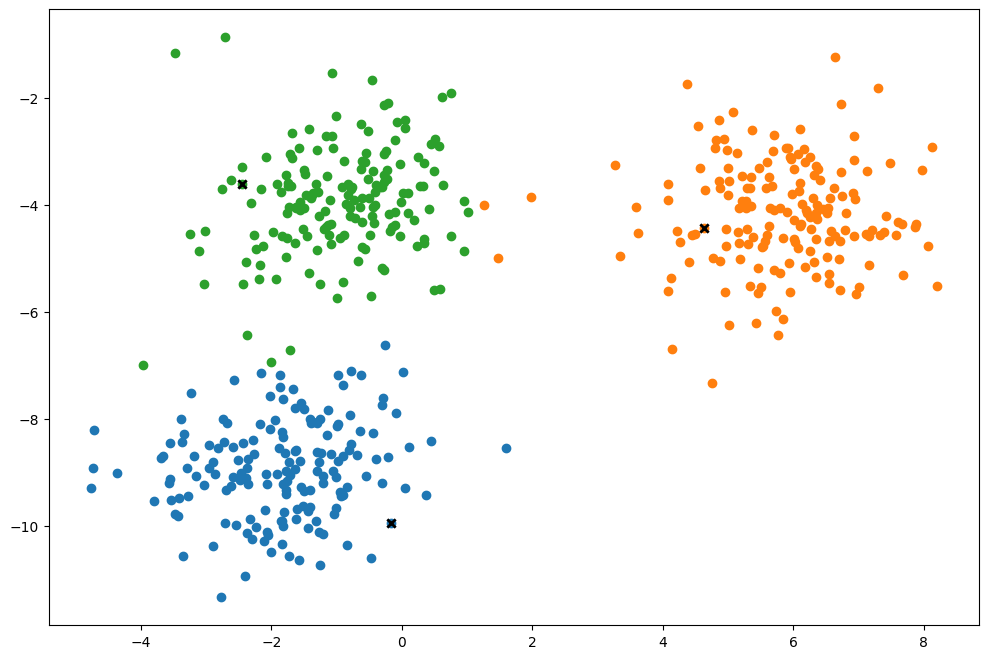

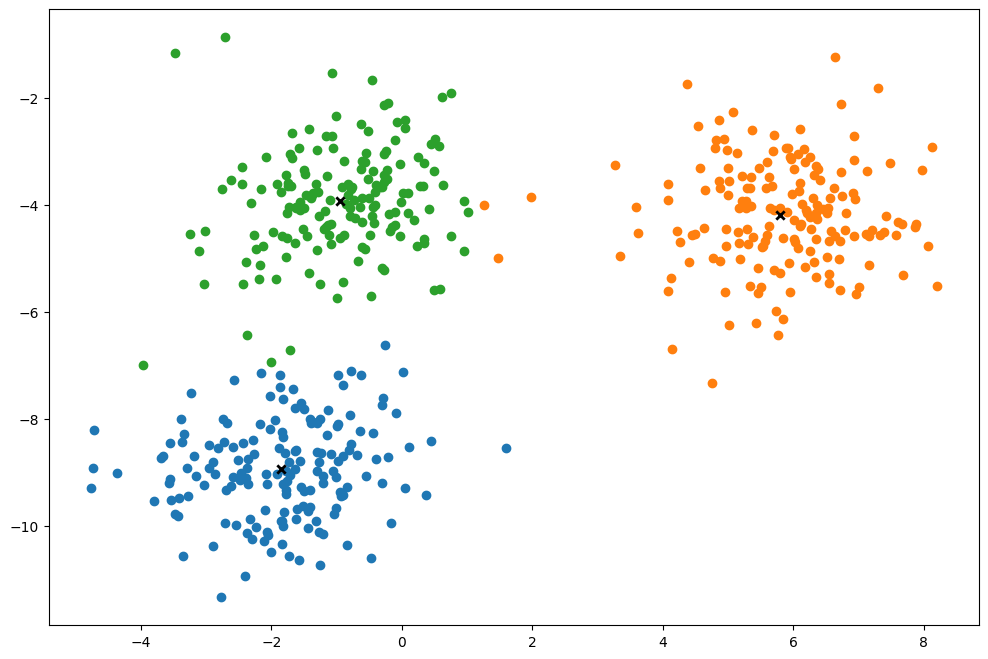

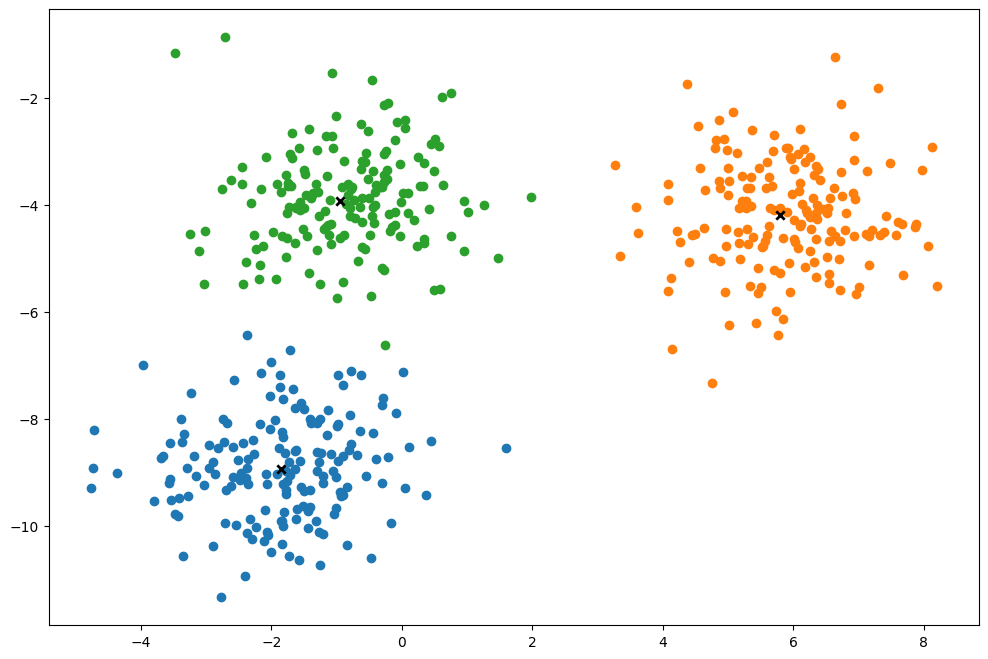

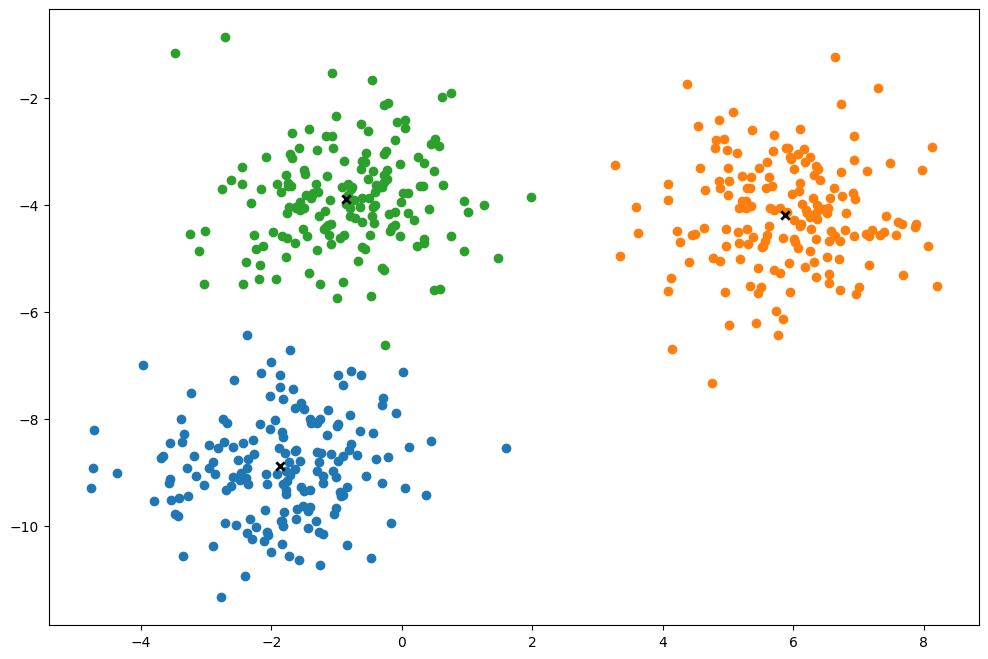

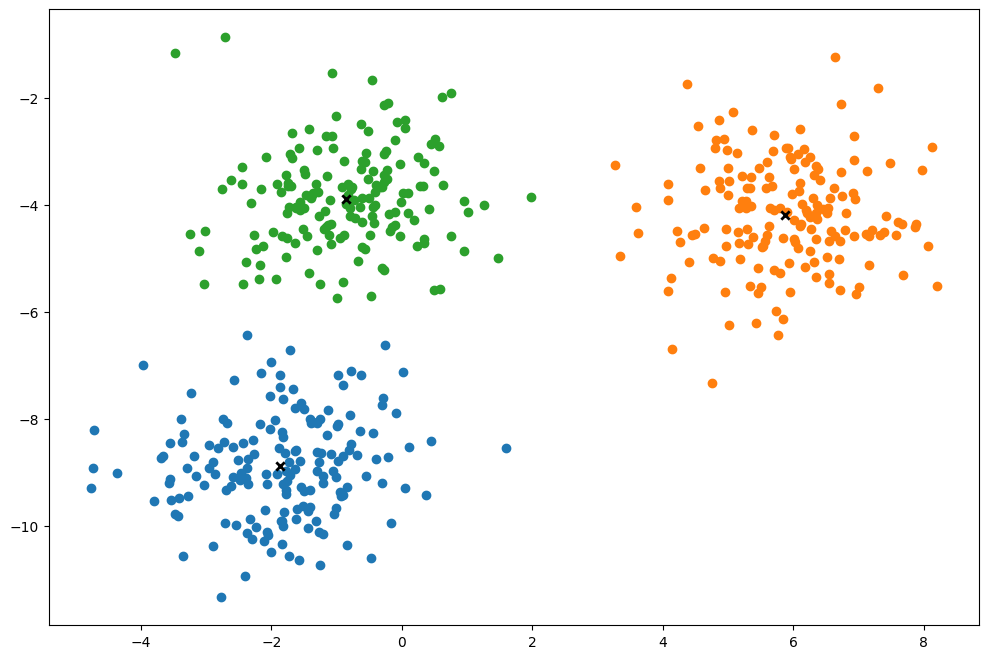

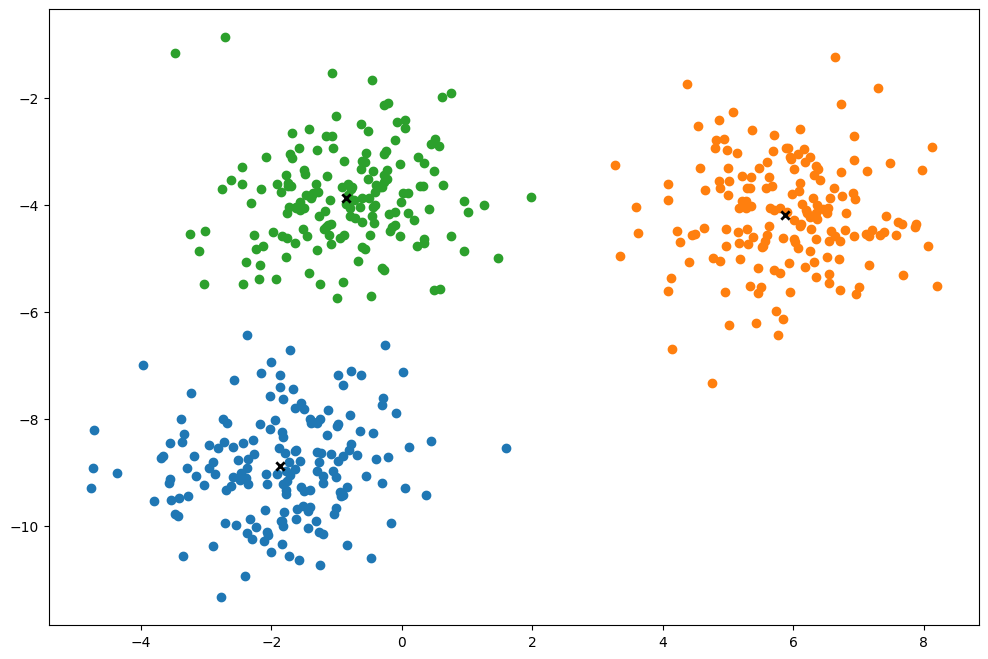

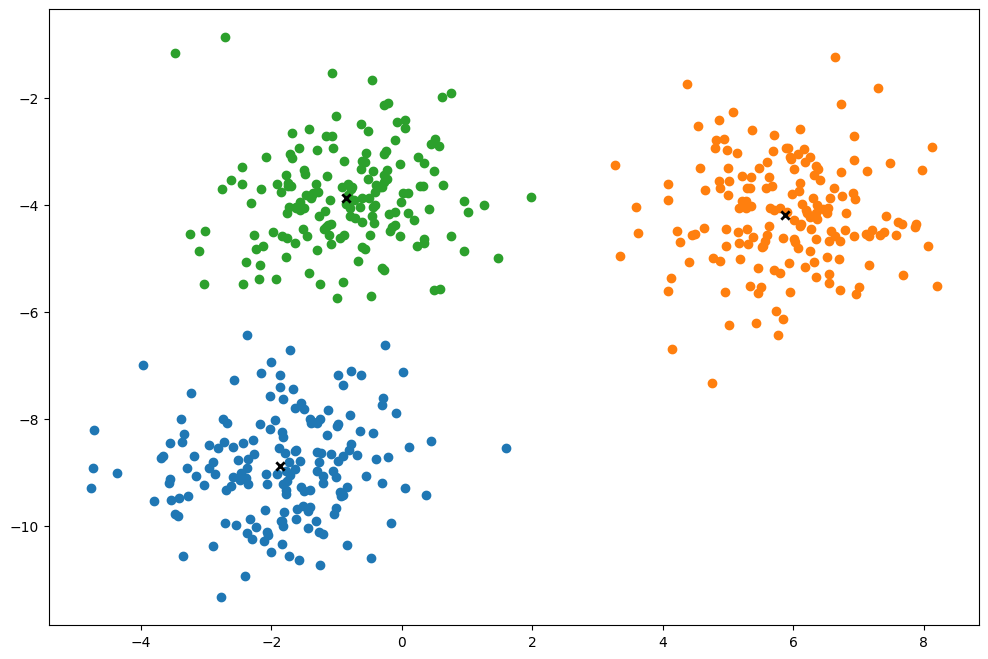

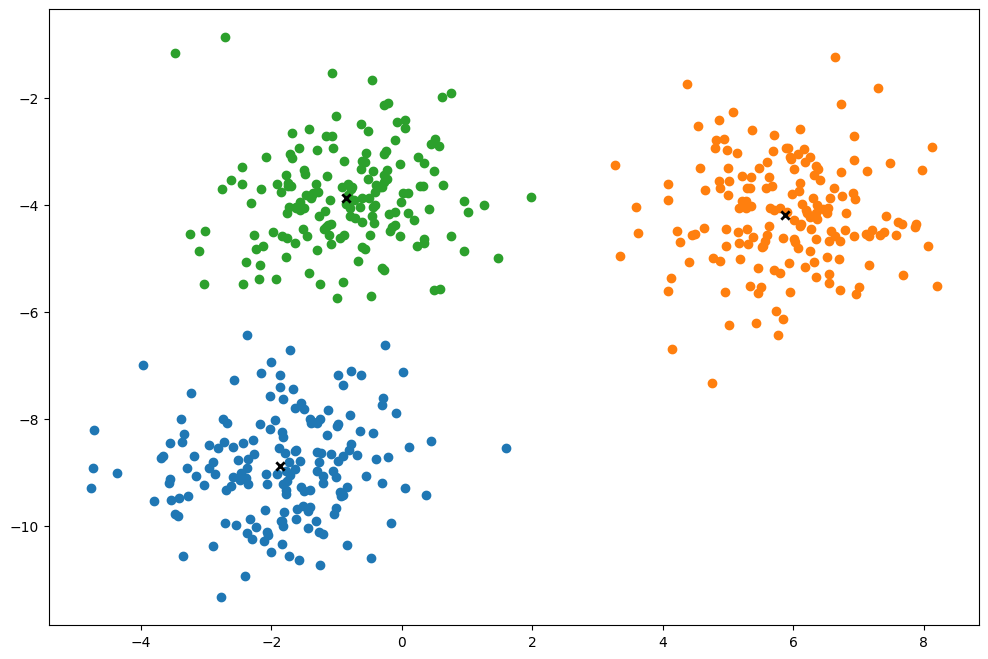

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(K=clusters, max_iters=200)
y_pred = k.fit(X)

k.plot()

## PCA

Steps :
for data X
- Center the data X by subtracting mean
- calcuate eigenvector and eigen values of Cov(X)
- sort vectors and values by eigen values
- choose first k
- transform original n-dimesnion data points to k dimensions, i.e project onto these vectos using dotproduct


In [ ]:
import numpy as np


class PCA:

  def __init__(self,n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None

  def fit(self,X):
    self.mean = np.mean(X,axis=0)
    n = len(X)

    X = X - self.mean

    # #calc covariance of X
    # cov = np.dot(X.T,X) / (n-1)

    # #eigenvectors and values
    # eig_val, eig_vec = np.linalg.eig(cov)

    #other method is svd
    #the eigenvalues of covariance matrix are given by the sigma^2/(n-1)
    #and eigenvectors are given by V
    #wherer X = u sigma v.T -> svd
    u,sigma,v_t = np.linalg.svd(X)

    eigen_vec = v_t.T
    eigen_values = sigma**2 / (n-1)
    print(eigen_vec.shape)


    #sort
    idxs = np.argsort(eigen_values)[::-1] #desc
    eigen_values = eigen_values[idxs]
    eigen_vec = eigen_vec[:,idxs]#remember each col is a vector



    #take top k and set components

    self.components = eigen_vec[:,:self.n_components]


  def transform(self,X):
    X = X - self.mean
    return np.dot(X,self.components)





(2, 2)


<ipython-input-130-f813693a31a0>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
<ipython-input-130-f813693a31a0>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_projected, np.zeros_like(X_projected), c=y, alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))


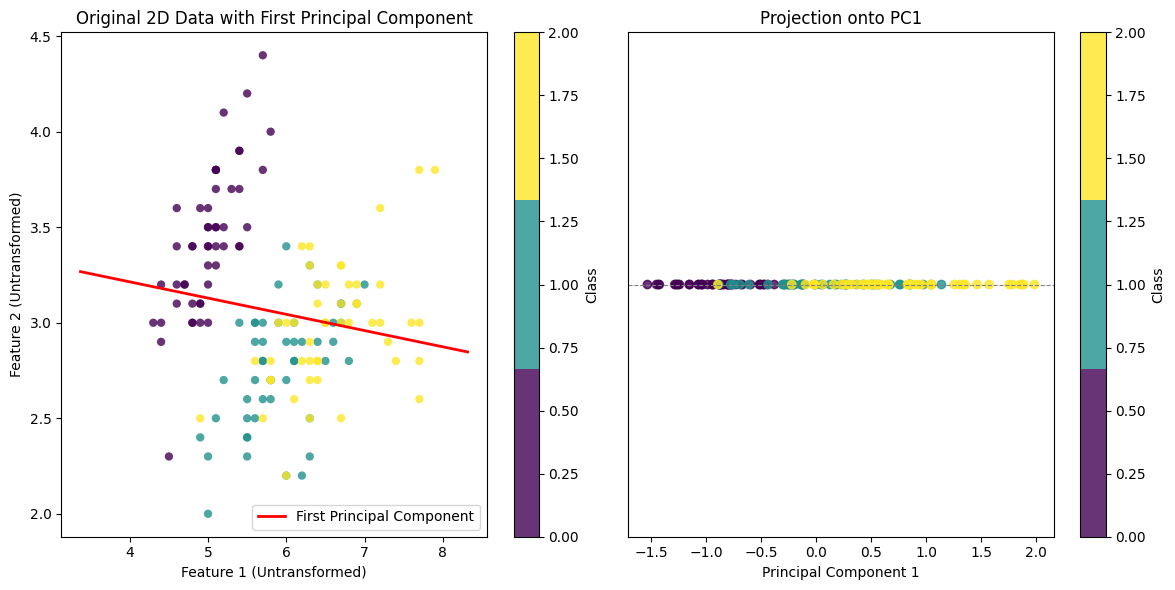

In [ ]:



# Load the Iris dataset
data = datasets.load_iris()
X = data.data
y = data.target

# Take the first two dimensions of the untransformed data for 2D visualization
X_2d_untransformed = X[:, :2]  # Select the first two features for visualization

# Create PCA instance and fit to the data
pca = PCA(n_components=1)
pca.fit(X_2d_untransformed)
X_projected = pca.transform(X_2d_untransformed)

# Get the first principal component (eigenvector) and mean
eigenvector = pca.components[:, 0]  # First principal component
mean = pca.mean

# Scale the eigenvector for visualization
eigenvector_scaled = eigenvector * np.sqrt(np.sum(X_projected**2) / len(X_2d_untransformed)) * 3  # Arbitrary scaling for display

# Compute start and end points of the first principal component line
pc_start = mean - eigenvector_scaled
pc_end = mean + eigenvector_scaled

# Plotting
plt.figure(figsize=(12, 6))

# Subplot 1: Original 2D data (untransformed) with first principal component
plt.subplot(1, 2, 1)
plt.scatter(
    X_2d_untransformed[:, 0], X_2d_untransformed[:, 1],
    c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)
plt.plot(
    [pc_start[0], pc_end[0]], [pc_start[1], pc_end[1]],
    color="red", linewidth=2, label="First Principal Component"
)
plt.xlabel("Feature 1 (Untransformed)")
plt.ylabel("Feature 2 (Untransformed)")
plt.title("Original 2D Data with First Principal Component")
plt.legend()
plt.colorbar(label="Class")

# Subplot 2: 1D Projection onto the first principal component
plt.subplot(1, 2, 2)
plt.scatter(X_projected, np.zeros_like(X_projected), c=y, alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)  # Reference line
plt.xlabel("Principal Component 1")
plt.yticks([])
plt.title("Projection onto PC1")
plt.colorbar(label="Class")

plt.tight_layout()
plt.show()


<ipython-input-131-60a0ce8faa3c>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
<ipython-input-131-60a0ce8faa3c>:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_projected, np.zeros_like(X_projected), c=y, alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))


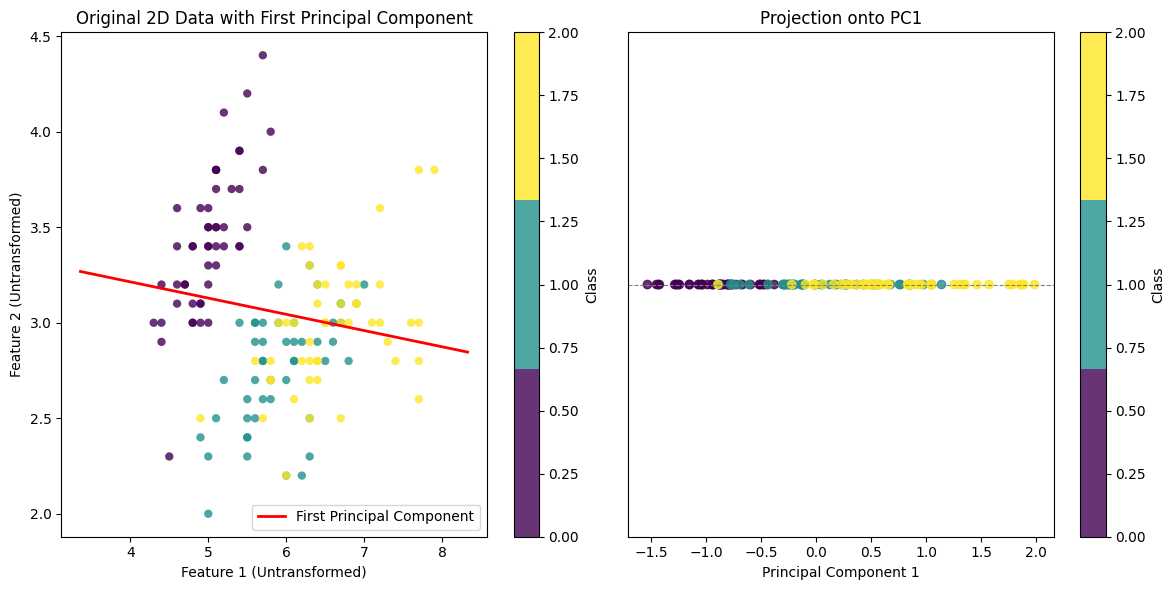

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets

# Load the Iris dataset
data = datasets.load_iris()
X = data.data
y = data.target

# Take the first two dimensions of the untransformed data for 2D visualization
X_2d_untransformed = X[:, :2]  # Select the first two features for visualization

# Perform PCA on the first two features
pca = PCA(n_components=1)
pca.fit(X_2d_untransformed)
X_projected = pca.transform(X_2d_untransformed)

# Get the first principal component (eigenvector) and mean
eigenvector = pca.components_[0]
mean = pca.mean_

# Scale the eigenvector for visualization
eigenvector_scaled = eigenvector * np.sqrt(pca.explained_variance_[0]) * 3  # Arbitrary scaling for display

# Compute start and end points of the first principal component line
pc_start = mean - eigenvector_scaled
pc_end = mean + eigenvector_scaled

# Plotting
plt.figure(figsize=(12, 6))

# Subplot 1: Original 2D data (untransformed) with first principal component
plt.subplot(1, 2, 1)
plt.scatter(
    X_2d_untransformed[:, 0], X_2d_untransformed[:, 1],
    c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)
plt.plot(
    [pc_start[0], pc_end[0]], [pc_start[1], pc_end[1]],
    color="red", linewidth=2, label="First Principal Component"
)
plt.xlabel("Feature 1 (Untransformed)")
plt.ylabel("Feature 2 (Untransformed)")
plt.title("Original 2D Data with First Principal Component")
plt.legend()
plt.colorbar(label="Class")

# Subplot 2: 1D Projection onto the first principal component
plt.subplot(1, 2, 2)
plt.scatter(X_projected, np.zeros_like(X_projected), c=y, alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)  # Reference line
plt.xlabel("Principal Component 1")
plt.yticks([])
plt.title("Projection onto PC1")
plt.colorbar(label="Class")

plt.tight_layout()
plt.show()


# SVM

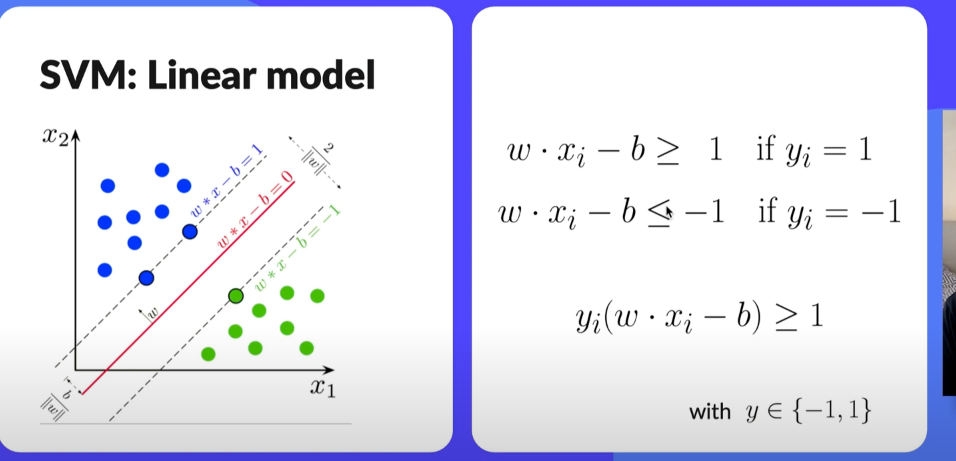

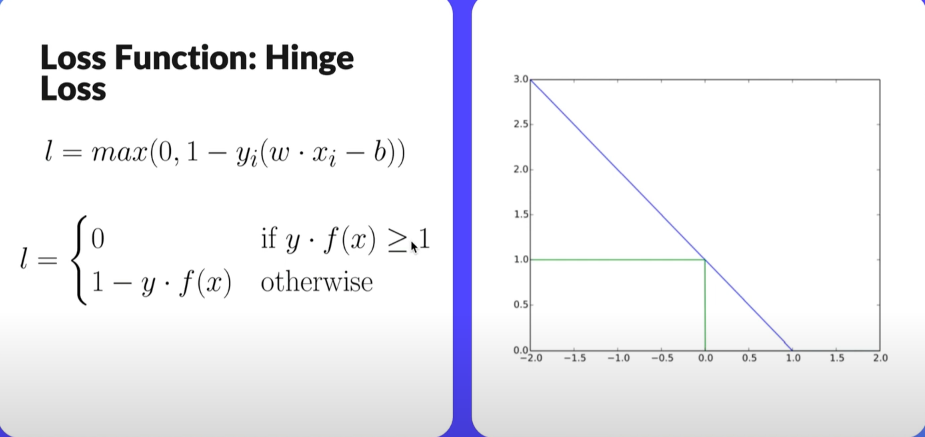

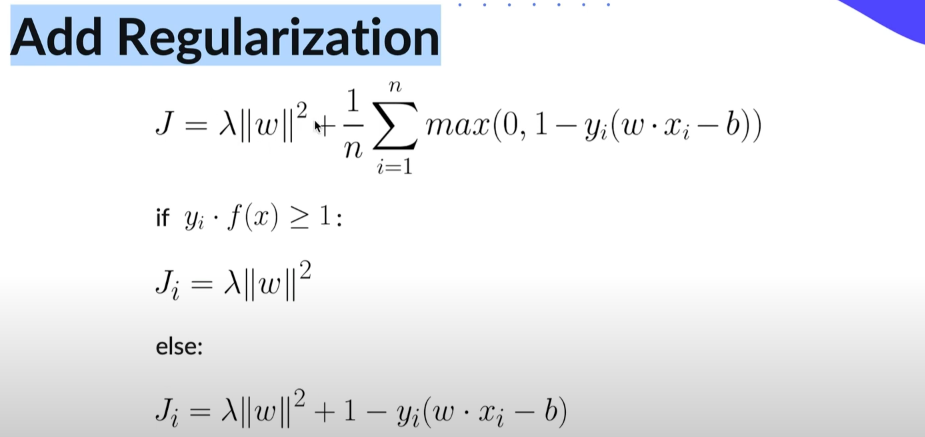

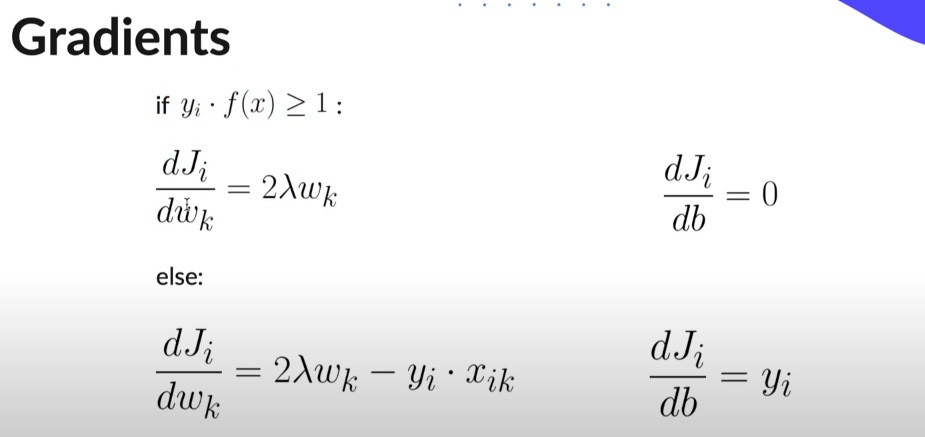

In [ ]:
import numpy as np

In [ ]:
class SVM:
  def __init__(self,lr=0.001,lambda_param=0.01,n_iters=1000):
    self.lr = lr
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b = None


  def fit(self,X,y):
    n_samples, n_features = X.shape

    y_ = np.where(y <=0 , -1, 1)

    self.w = np.random.randn(n_features)
    self.b = np.random.rand(1)

    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
        y_i = np.dot(x_i,self.w) - self.b

        condition = y_[idx] * y_i >=1

        if condition:
          dW = 2*self.lambda_param*self.w
          self.w -= self.lr * dW
        else:
          dW = 2*self.lambda_param*self.w - np.dot(x_i,y_[idx])
          dB = y_[idx]
          self.w -= self.lr * dW
          self.b -= self.lr * dB

  def predict(self,X):
    #X -> mxd
    #w -> dx1
    #y -> mx1
    pred = np.sign(np.dot(X,self.w) - self.b)

    return pred



SVM classification accuracy 1.0


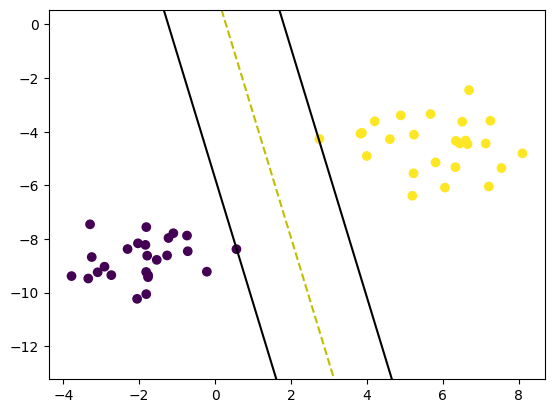

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("SVM classification accuracy", accuracy(y_test, predictions))

def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()